# **Проблемы в данных: пропуски, выбросы, дубликаты**




In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sales_with_duplicates.csv', sep=',')
sales.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00


In [ ]:
numbers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/numbers.csv', sep=',')
numbers.head()

,1010.005807
0,997.384196
1,997.088963
2,1006.088979
3,998.465880
4,993.813991


### Посмотрим sales на наличие дубликатов

In [ ]:
sales.duplicated().head()

,0
0,False
1,False
2,False
3,False
4,False


### Посчитаем кол-во строк, являющихся полными дубликатами

In [ ]:
sales[sales.duplicated(keep=False)].head(10)

,order_id,date,customer_id,category,region,sales,quantity,discount
58,43416663,2017-02-14,572,Спорт и отдых,Хабаровский край,9162.0,3,0.03
59,43416663,2017-02-14,572,Спорт и отдых,Хабаровский край,9162.0,3,0.03
168,90186037,2017-07-02,676,Спорт и отдых,Краснодарский край,8677.0,3,0.00
169,90186037,2017-07-02,676,Спорт и отдых,Краснодарский край,8677.0,3,0.00
198,21721193,2018-01-04,706,Продукты питания,Красноярский край,2857.0,3,0.00
199,21721193,2018-01-04,706,Продукты питания,Красноярский край,2857.0,3,0.00
289,17700181,2017-12-07,794,Продукты питания,Краснодарский край,3700.0,4,0.05
290,17700181,2017-12-07,794,Продукты питания,Краснодарский край,3700.0,4,0.05
298,44800120,2017-04-01,802,Бытовая техника,Краснодарский край,3538.0,3,0.03
299,44800120,2017-04-01,802,Бытовая техника,Краснодарский край,3538.0,3,0.03


In [ ]:
sales.duplicated().sum()

49203

### Отфильтруем из данных строки, содержащие пропуски по цене

In [ ]:
sales[sales['sales'].isnull()].head()

,order_id,date,customer_id,category,region,sales,quantity,discount
134,69529912,2017-07-06,642,Продукты питания,Хабаровский край,NaN,3,0.05
145,44640019,2017-01-20,653,Одежда и обувь,Краснодарский край,NaN,2,0.10
308,94668334,2017-01-24,810,Продукты питания,Красноярский край,NaN,3,0.00
371,62898725,2017-01-13,861,Одежда и обувь,Московская область,NaN,4,0.03
517,58158808,2017-05-06,990,Спорт и отдых,Краснодарский край,NaN,2,0.00


In [ ]:
sales_without_na = sales[sales['sales'].notna()]
sales_without_na.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00


### 5%-ный и 95%-ный порог по цене заказа для категорий «Одежда и обувь»

In [ ]:
clothes_and_shoes = sales_without_na[sales_without_na['category'] == 'Одежда и обувь']
clothes_and_shoes.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
6,98709601,2017-01-15,519,Одежда и обувь,Владимирская область,1737.0,1,0.05
8,50948190,2017-01-11,522,Одежда и обувь,Приморский край,2309.0,2,0.10
9,20172776,2017-01-23,522,Одежда и обувь,Приморский край,4406.0,1,0.03
15,10603757,2017-02-23,530,Одежда и обувь,Иркутская область,1727.0,3,0.00


In [ ]:
quantile_5 = clothes_and_shoes['sales'].quantile(0.05)
quantile_5

248.0

In [ ]:
quantile_95 = clothes_and_shoes['sales'].quantile(0.95)
quantile_95

5648.149999999965

### Гистограмма распределения полученных данных по цене заказа

<Axes: >

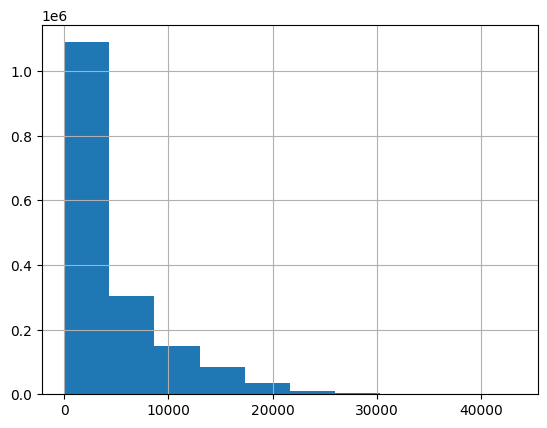

In [ ]:
sales['sales'].hist()

<Axes: >

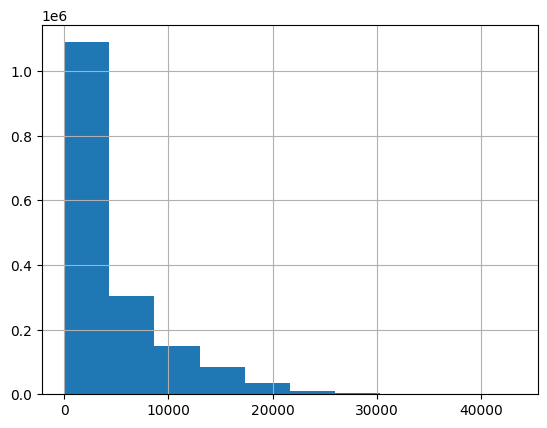

In [ ]:
sales_without_na['sales'].hist()

<Axes: >

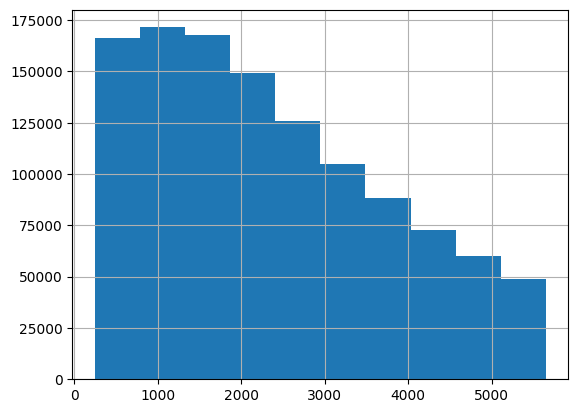

In [ ]:
sales[(sales['sales'] >= quantile_5) & (sales['sales'] <= quantile_95)]['sales'].hist()